In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 读取负荷数据集
re_df = pd.read_csv('./re_allbus_p.csv')

In [2]:
# 提取负荷数据
re_data = re_df.iloc[:,0:16].values
features = np.column_stack((re_data,))

In [3]:
mergings = linkage(features , method='complete')


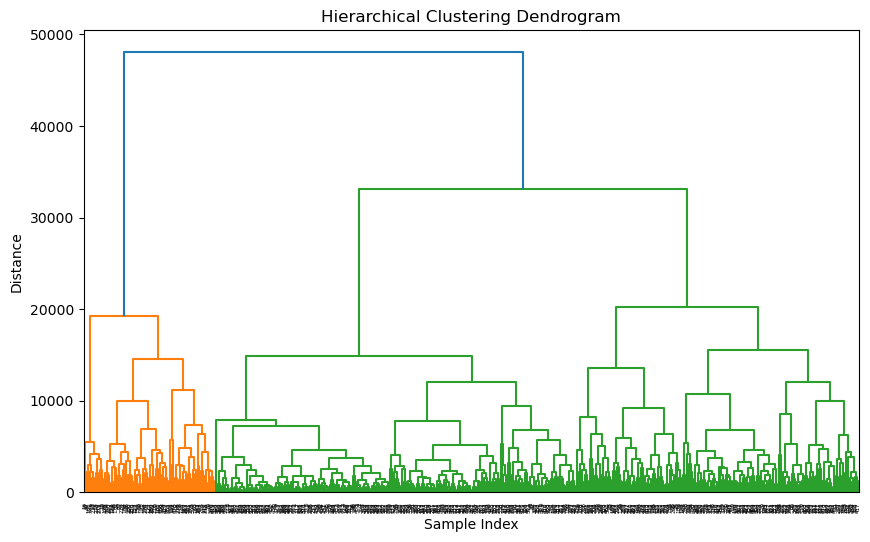

In [4]:
# 绘制层次聚合的树状图
plt.figure(figsize=(10, 6))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=4,)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [5]:
# 根据层次聚合结果获取聚类标签
threshold = 18000  # 设定阈值
clusters = fcluster(mergings, threshold, criterion='distance')
# 获取聚类簇的数量
num_clusters = len(np.unique(clusters))
print(num_clusters)

5


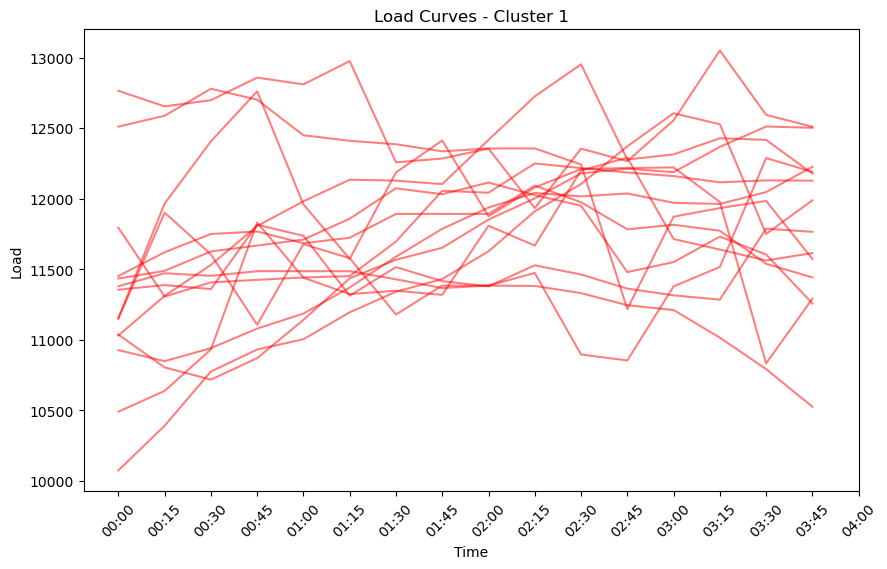

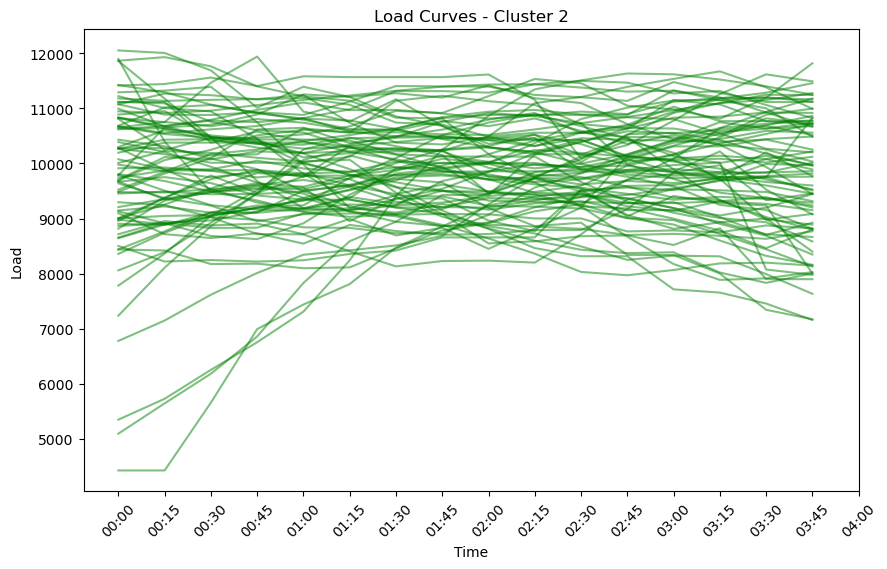

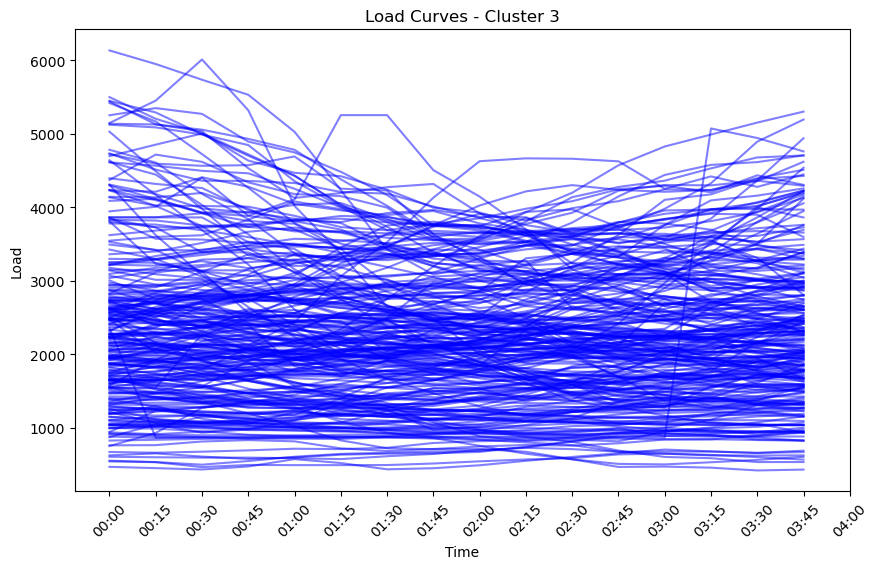

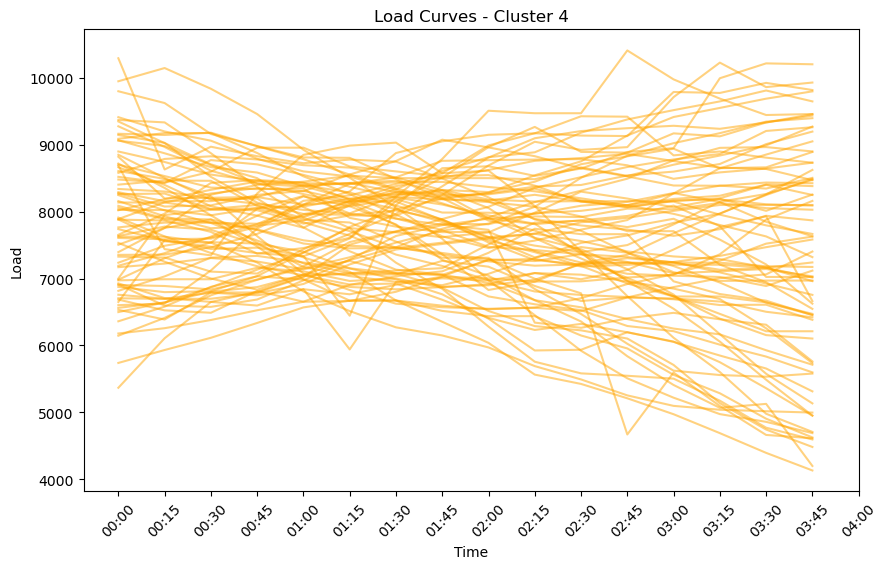

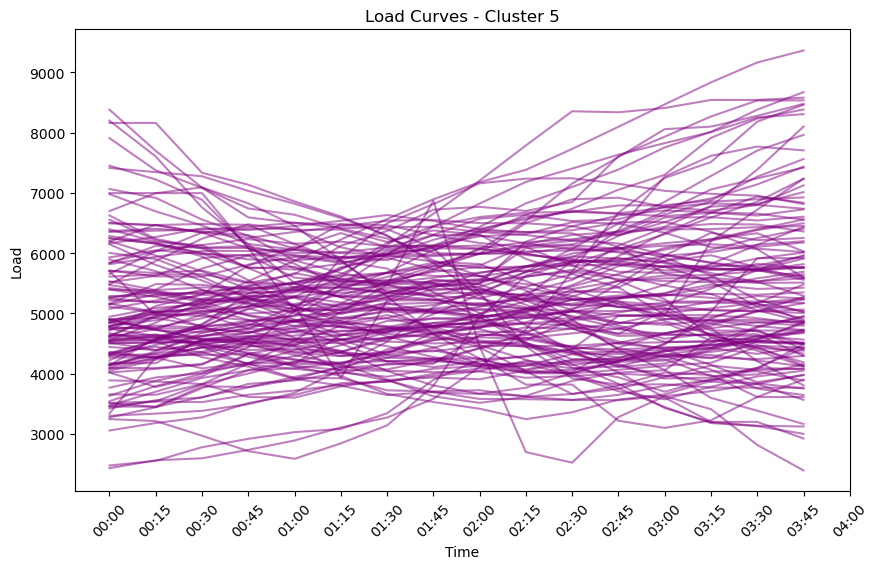

16


In [6]:
# 定义颜色列表
colors = ['red', 'green', 'blue', 'orange', 'purple']

# 绘制每个聚类簇的负荷曲线
num_intervals = re_data.shape[1]  # 时间间隔数量
interval_labels = pd.date_range(start='00:00', end='4:00', freq='15min').strftime('%H:%M')  # 生成时间标签
for cluster_id in range(1, num_clusters+1):
    plt.figure(figsize=(10, 6))
    for i in range(len(clusters)):
        if clusters[i] == cluster_id:
            plt.plot(range(num_intervals), re_data[i], color=colors[cluster_id-1], alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Load')
    plt.title(f'Load Curves - Cluster {cluster_id}')
    plt.xticks(range(0, num_intervals+1), interval_labels, rotation=45)  # 设置x轴刻度和标签
    plt.savefig(f'cluster_{cluster_id}_re_curve.png')  # 保存图像
    plt.show()
    plt.close()  # 关闭图像窗口
print(num_intervals)

In [7]:
# 将聚类结果标记在loadweather数据集的Cluster列上
re_df.loc[:, 'Cluster'] = fcluster(mergings, 5, criterion='maxclust')

# 保存修改后的数据集到原始CSV文件
re_df.to_csv('re_allbus_p.csv', index=False)